# 0. Import Modules and Setup Global Variables

In [1]:
from METR4911_package import *
import cv2, os
import numpy as np
import math as m
%matplotlib inline

# 1. Detect Static Image

---------------------- FINGER CLASS --------------------
SIDE: [0.0, 'Person', 0.91822773, 0, 206, 252, 336, (-1, 186, 75, 206, 2, 202)]
TOP: None

-------------------- FRUIT/VEGETABLES ------------------
SIDE: [0.0, 'Orange', 0.9489079, 279, 186, 438, 332, (278, 166, 354, 186, 281, 182)]
TOP: None

FRUIT/VEGETABLE STATS
-------------------------------------------------
Orange area (cm2): 44.33024691358025
Orange volume (cm3): 370.79212066651127
Orange mass (grams): 281.80201170654857
Orange calories: 132.44694550207782
-------------------------------------------------

Number of pixels in 1cm line: 18


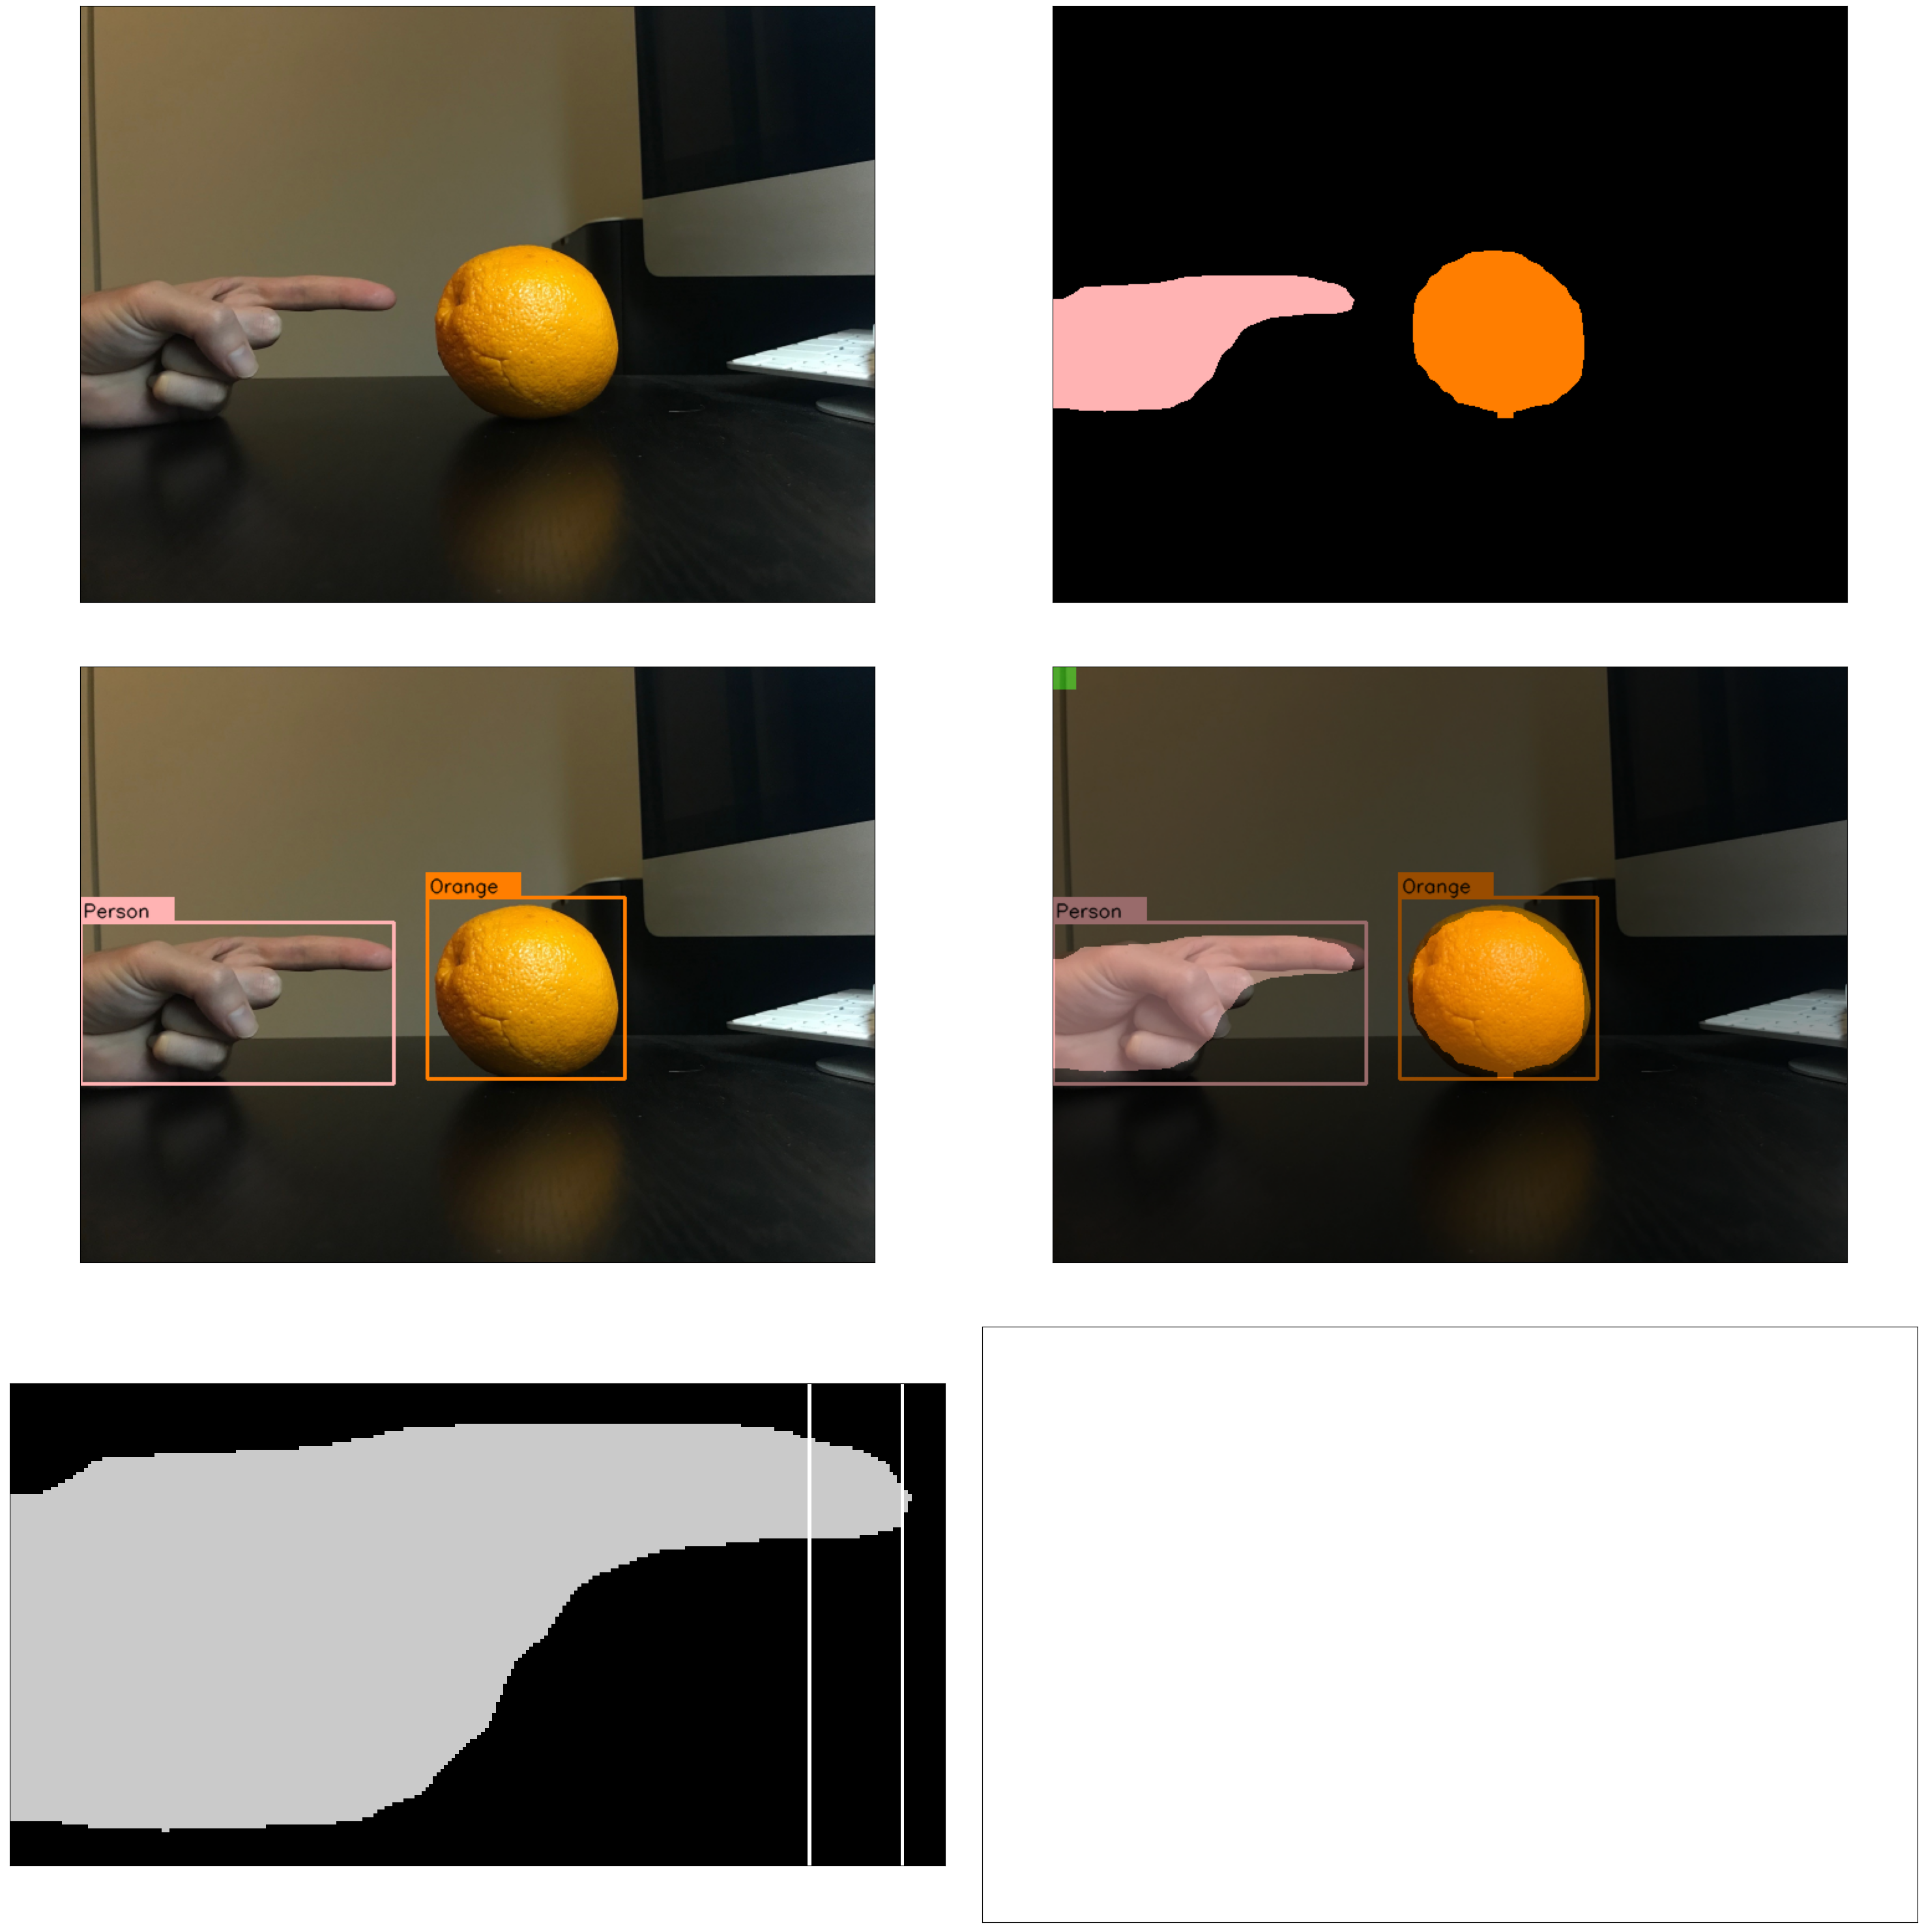

In [2]:
img_file = "orange7_324gram.jpg"
img_path = os.path.join("WebCam_images", "orange_test", img_file)

# object_detect_img(img_path)
demo_objects, demo_finger, demo_original_img, demo_segmentation_img, demo_object_detect_img = object_detect_img(img_path)

# 3. Show individual fruit/vegetable grey colour

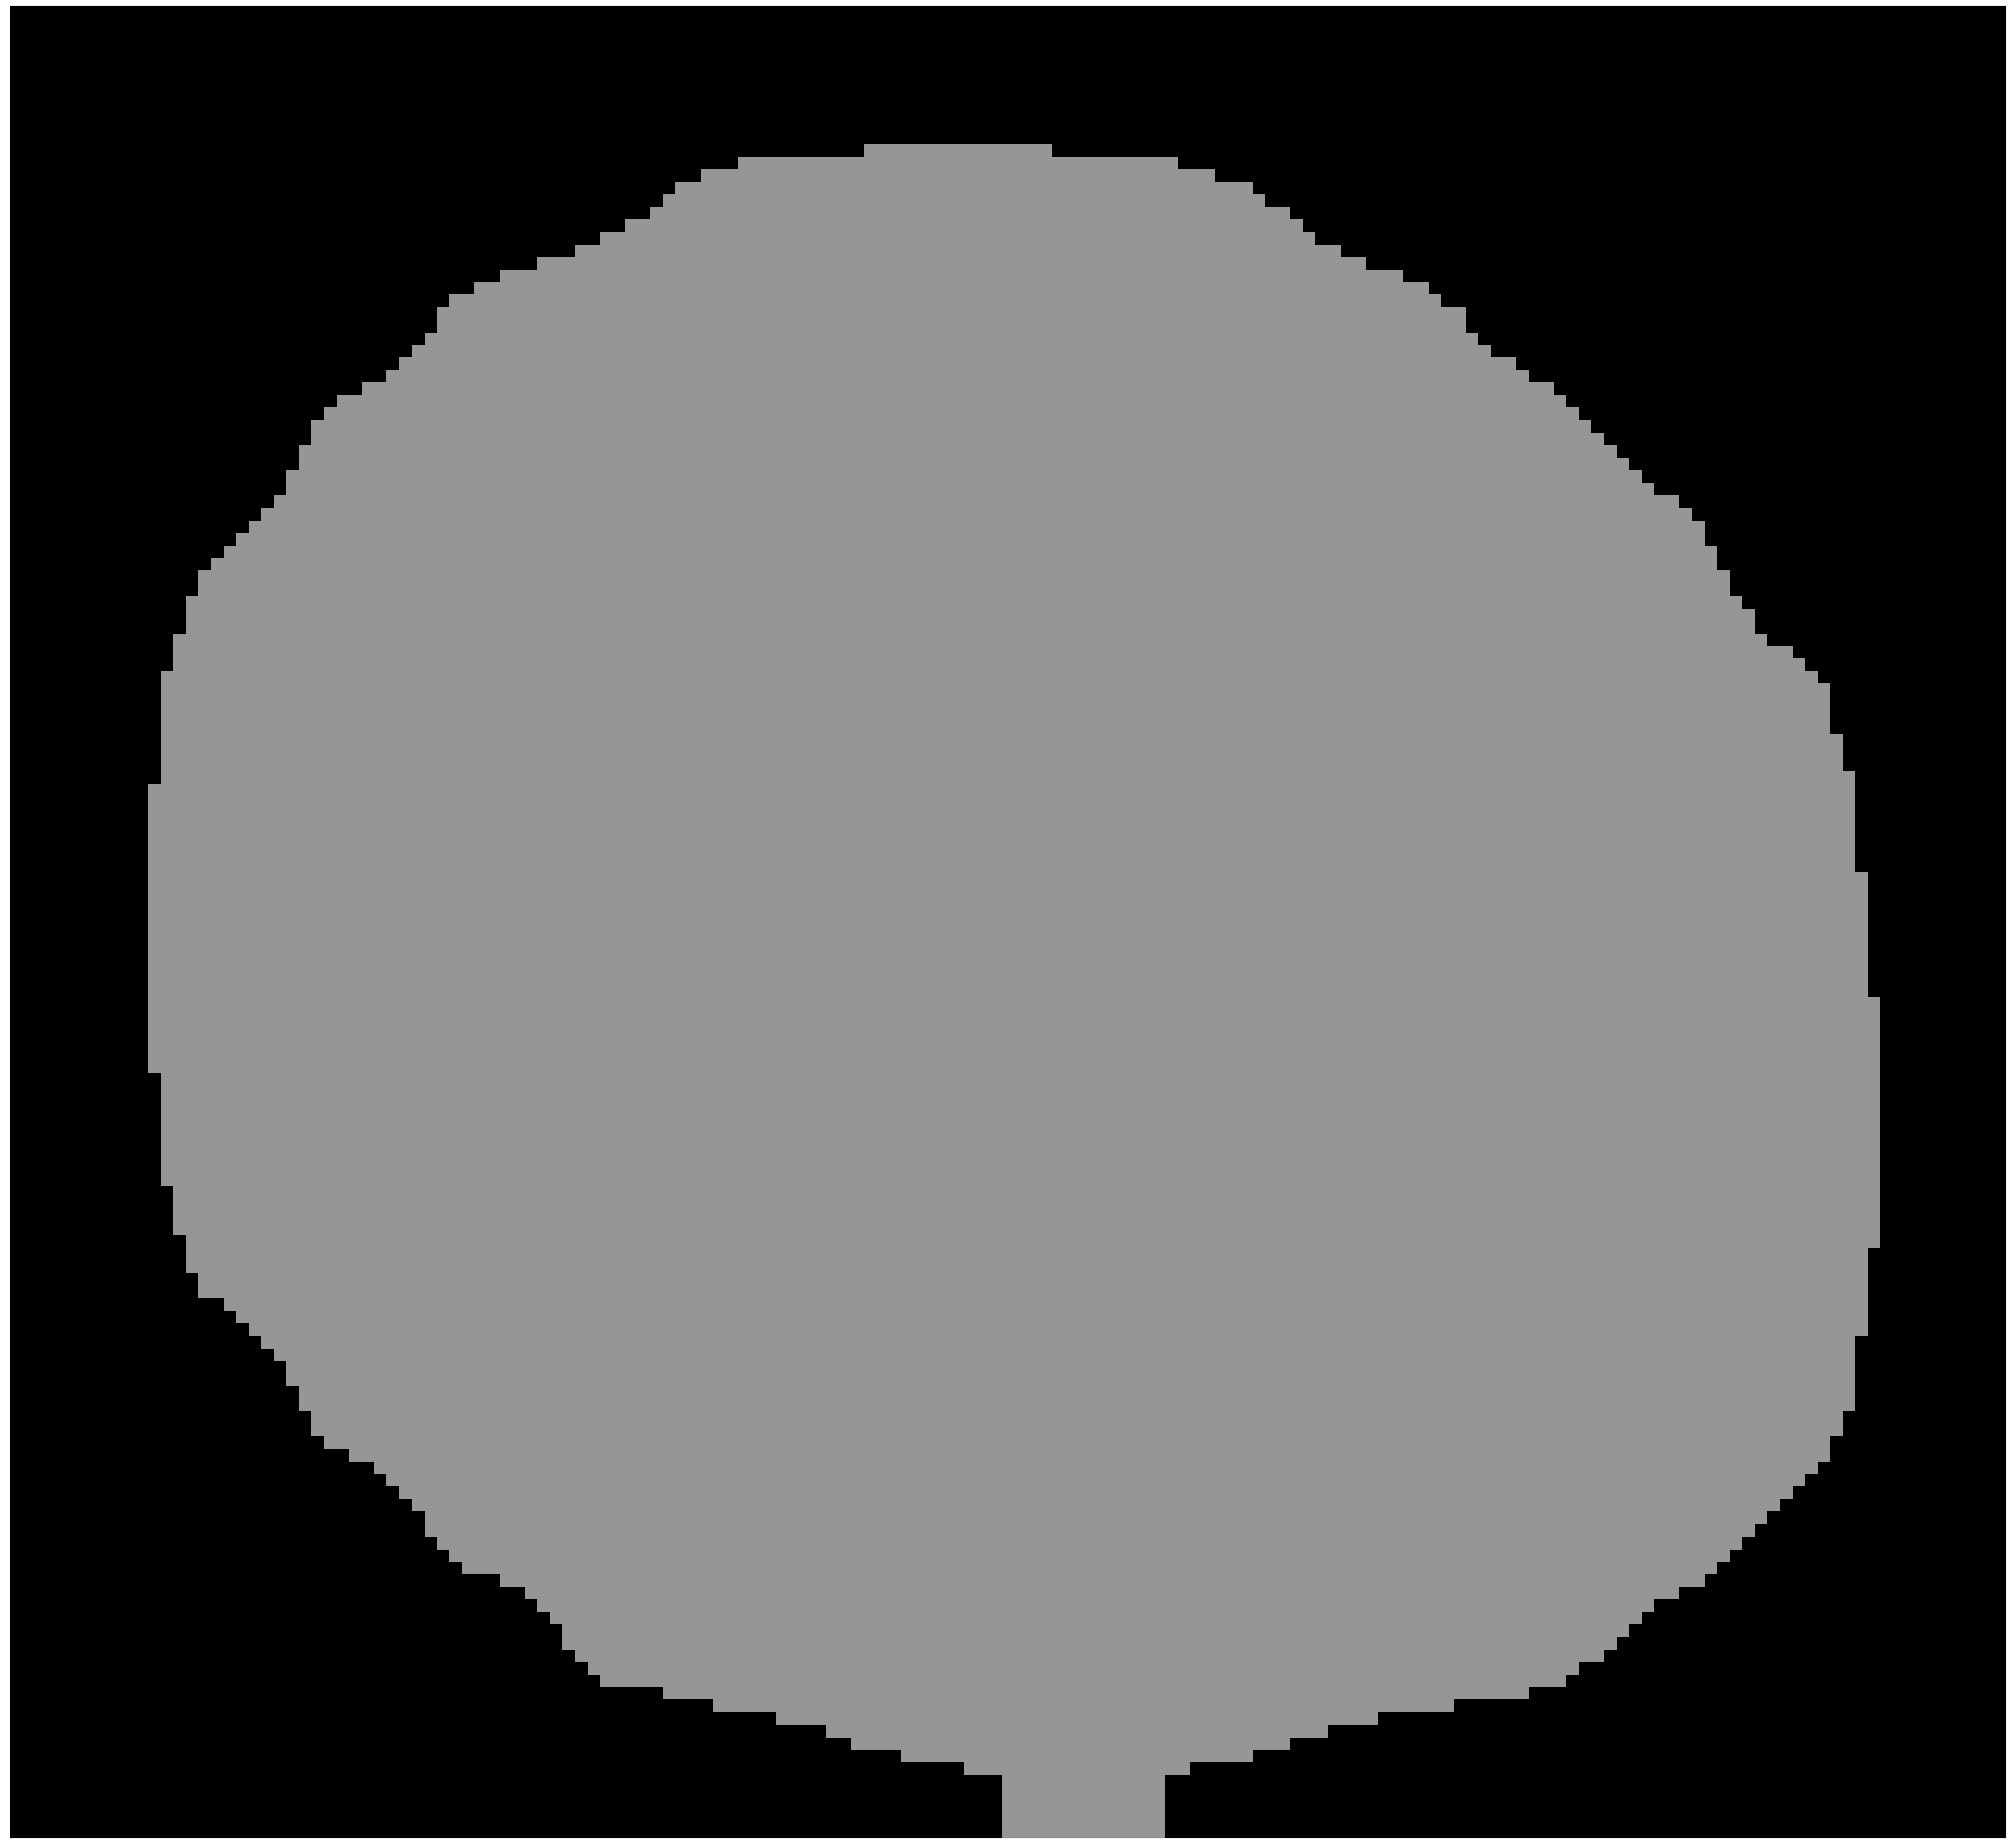

In [3]:
#TODO: Add function to show the finger debugging line process and the banana one as well, just the grey images
num_objects = len(demo_objects)

if num_objects == 1:
    fig, axe  = plt.subplots(num_objects, 1, figsize=(30, 30))
    fig.tight_layout(h_pad=5)
    axe.xaxis.set_visible(False)
    axe.yaxis.set_visible(False)
    if demo_objects[0].get_name() == "Banana":
        axe.imshow(cv2.cvtColor(demo_objects[0].finger_3_lines, cv2.COLOR_BGR2RGB))
    else:
        axe.imshow(cv2.cvtColor(demo_objects[0].object_itself_grey, cv2.COLOR_BGR2RGB))

elif num_objects == 2:
    fig, axe  = plt.subplots(1, 2, figsize=(30, 30))
    fig.tight_layout(h_pad=5)
    axe[0].xaxis.set_visible(False)
    axe[0].xaxis.set_visible(False)
    axe[1].yaxis.set_visible(False)
    axe[1].yaxis.set_visible(False)
    
    if demo_objects[0].get_name() == "Banana":
        axe[0].imshow(cv2.cvtColor(demo_objects[0].finger_3_lines, cv2.COLOR_BGR2RGB))
    else:
        axe[0].imshow(cv2.cvtColor(demo_objects[0].object_itself_grey, cv2.COLOR_BGR2RGB))
        
    if demo_objects[1].get_name() == "Banana":
        axe[1].imshow(cv2.cvtColor(demo_objects[1].finger_3_lines, cv2.COLOR_BGR2RGB))
    else:
        axe[1].imshow(cv2.cvtColor(demo_objects[1].object_itself_grey, cv2.COLOR_BGR2RGB))
    
else:
    index = m.ceil(num_objects/2)
    # print("Index:",index)
    fig, axe  = plt.subplots(index, 2, figsize=(30, 30))
    fig.tight_layout(h_pad=5,w_pad=5)
    
    # Set axes off
    for i in range(index):
        axe[i,0].xaxis.set_visible(False)
        axe[i,0].yaxis.set_visible(False)
        axe[i,1].xaxis.set_visible(False)
        axe[i,1].yaxis.set_visible(False)
    
    # Plot objects in each subplot
    for num in range(num_objects):
        if demo_objects[num].get_name() == "Banana":
            axe[num//2,num%2].imshow(cv2.cvtColor(demo_objects[num].finger_3_lines, cv2.COLOR_BGR2RGB))
        else:
            axe[num//2,num%2].imshow(cv2.cvtColor(demo_objects[num].object_itself_grey, cv2.COLOR_BGR2RGB))
        # # print(num//2,num%2)

[0.0, 'Orange', 0.9489079, 279, 186, 438, 332, (278, 166, 354, 186, 281, 182)]


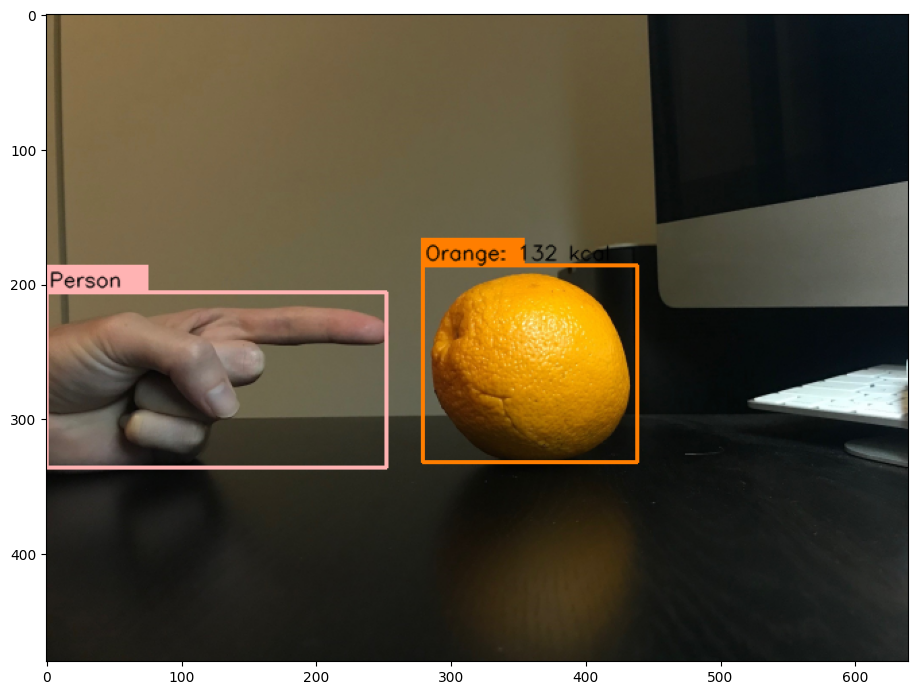

In [13]:
# Draw new label overtop existing with name + calorie
full_object_detect_calorie = demo_object_detect_img.copy()
# plt.imshow(cv2.cvtColor(full_object_detect_calorie, cv2.COLOR_BGR2RGB))  # Inline show image in notebook

# Draw Box
# cv2.rectangle(img, (label_x,label_y), (label_x2,label_y2), color, cv2.FILLED)

# # Draw Text
font = cv2.FONT_HERSHEY_SIMPLEX
# cv2.putText(img, LABELS[class_id], (x + pad_x, y - pad_y), font, 0.5, (0,0,0), 1, cv2.LINE_AA)

for item in demo_objects:
    print(item.box)
    label = f'{item.get_name()}: {round(item.get_calorie())} kcal' 

    cv2.rectangle(full_object_detect_calorie, (item.box[7][:2]), (item.box[7][2:4]), COLORS[item.get_name()], cv2.FILLED)
    cv2.putText(full_object_detect_calorie, label, (item.box[7][4:]), font, 0.5, (0,0,0), 1, cv2.LINE_AA)


plt.imshow(cv2.cvtColor(full_object_detect_calorie, cv2.COLOR_BGR2RGB))  # Inline show image in notebook

